In [1]:
import sys
import os

# Dynamically add the pykan package directory to the Python path
package_path = os.path.join(os.path.dirname(os.getcwd()), 'pykan')
sys.path.append(package_path)

In [2]:
os.getcwd()

'c:\\Users\\Cyrill\\Documents\\semester_3\\individual_project\\Projet_individuel_KAN'

In [3]:
os.path.dirname(os.getcwd())

'c:\\Users\\Cyrill\\Documents\\semester_3\\individual_project'

In [4]:
package_path

'c:\\Users\\Cyrill\\Documents\\semester_3\\individual_project\\pykan'

In [5]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import torch
import numpy as np

In [6]:
temp = [0,1,2,3,4,5,6,7]
temp[3:7]

[3, 4, 5, 6]

In [7]:
winddata_path = os.path.join('..\\Liao_code','Task15_W_Zone6.csv')
data = pd.read_csv(winddata_path)
Y = data.iloc[:, 2].values.astype(np.float64)  
X = data.iloc[:, 3:7].values.astype(np.float64)


scaler = MinMaxScaler()
X= scaler.fit_transform(X)
split1 = int(0.1 * len(X))
split2 = int(0.9 * len(X))

X_train, y_train = X[:split1], Y[:split1]
X_val, y_val = X[split1:split2], Y[split1:split2]
X_test, y_test = X[split2:], Y[split2:]

ndarray_data = [X_train, y_train, X_val, y_val, X_test, y_test]
tensor_data_list = [torch.from_numpy(x) for x in ndarray_data]

tensor_data_list[1] = tensor_data_list[1].unsqueeze(1)  # y_train
tensor_data_list[3] = tensor_data_list[3].unsqueeze(1)  # y_val
tensor_data_list[5] = tensor_data_list[5].unsqueeze(1)  # y_test

# The KAN Class trains on train/validation called train_input/test_input
dataset = { 'train_input': tensor_data_list[0],
            'train_label': tensor_data_list[1],
            'test_input': tensor_data_list[2],
            'test_label': tensor_data_list[3],
            'true_test_input': tensor_data_list[4],
            'true_test_label': tensor_data_list[5]  }

dataset['train_input'].shape, dataset['train_label'].shape


(torch.Size([1680, 4]), torch.Size([1680, 1]))

In [8]:
dataset['train_input']

tensor([[0.4335, 0.4534, 0.4360, 0.4929],
        [0.4233, 0.4949, 0.4260, 0.5257],
        [0.4067, 0.5228, 0.4119, 0.5474],
        ...,
        [0.2540, 0.4556, 0.2873, 0.4505],
        [0.2954, 0.4703, 0.3213, 0.4941],
        [0.3669, 0.4829, 0.3848, 0.5137]], dtype=torch.float64)

In [9]:
from kan import *
torch.set_default_dtype(torch.float64)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

# create a KAN: 2D inputs, 1D output, and 5 hidden neurons. cubic spline (k=3), 5 grid intervals (grid=5).
model = KAN(width=[4,4,1], grid=3, k=3, seed=42, device=device)

cpu
checkpoint directory created: ./model
saving model version 0.0


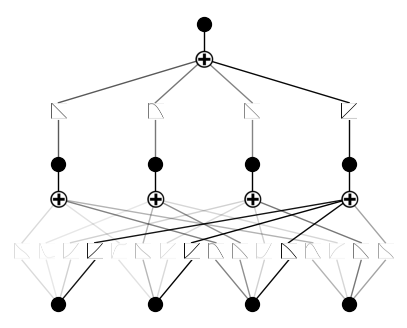

In [10]:
# plot KAN at initialization
model(tensor_data_list[0])
model.plot()

In [11]:
model.fit(dataset, steps=50, lamb=0.001)

| train_loss: 1.58e-01 | test_loss: 1.86e-01 | reg: 6.39e+00 | : 100%|█| 50/50 [00:40<00:00,  1.22it

saving model version 0.1


{'train_loss': [array(0.17771131),
  array(0.15968305),
  array(0.15724657),
  array(0.15671614),
  array(0.1568033),
  array(0.15662438),
  array(0.15776941),
  array(0.15698378),
  array(0.15669654),
  array(0.15655741),
  array(0.15657475),
  array(0.15661634),
  array(0.15668653),
  array(0.15683674),
  array(0.15687712),
  array(0.15700522),
  array(0.15699427),
  array(0.15716902),
  array(0.15734658),
  array(0.15777644),
  array(0.15855045),
  array(0.15859938),
  array(0.15848069),
  array(0.15832737),
  array(0.15820945),
  array(0.15821533),
  array(0.1581706),
  array(0.15814823),
  array(0.15809011),
  array(0.15805922),
  array(0.15802088),
  array(0.15796615),
  array(0.15795818),
  array(0.15794124),
  array(0.15792362),
  array(0.15791303),
  array(0.15791252),
  array(0.15789517),
  array(0.15788776),
  array(0.15788183),
  array(0.15788951),
  array(0.15787668),
  array(0.15786554),
  array(0.15785657),
  array(0.15784869),
  array(0.15783664),
  array(0.15780777),
 

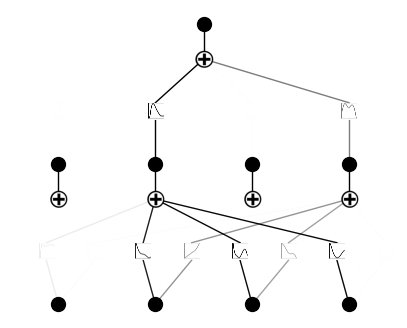

In [12]:
model.plot()

In [13]:
model = model.prune()

saving model version 0.2


In [14]:
model.fit(dataset, steps=50, lamb=0.001)

| train_loss: 1.99e-01 | test_loss: 2.78e-01 | reg: 4.17e+00 | : 100%|█| 50/50 [00:28<00:00,  1.75it

saving model version 0.3


{'train_loss': [array(0.22330604),
  array(0.20255193),
  array(0.19954687),
  array(0.19892811),
  array(0.19863387),
  array(0.19937673),
  array(0.19928334),
  array(0.19909153),
  array(0.19905595),
  array(0.19904485),
  array(0.19907582),
  array(0.19907436),
  array(0.19903698),
  array(0.19904368),
  array(0.1990344),
  array(0.19906811),
  array(0.1990645),
  array(0.19903961),
  array(0.1990188),
  array(0.19901769),
  array(0.19902889),
  array(0.19896891),
  array(0.19883597),
  array(0.19878712),
  array(0.19870897),
  array(0.19867874),
  array(0.19863912),
  array(0.19864466),
  array(0.19864047),
  array(0.19862907),
  array(0.19882041),
  array(0.19872702),
  array(0.1986668),
  array(0.19864323),
  array(0.1986424),
  array(0.19874844),
  array(0.19873345),
  array(0.19873617),
  array(0.19871517),
  array(0.19868441),
  array(0.1988077),
  array(0.1987719),
  array(0.19862241),
  array(0.19856367),
  array(0.19855482),
  array(0.19882534),
  array(0.19858182),
  arra

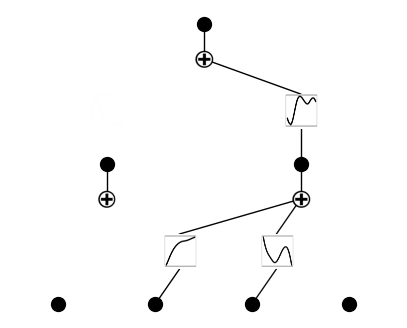

In [15]:
model.plot()

In [16]:
predictions = model(dataset['true_test_input']).detach().numpy()
predictions

array([[0.15547611],
       [0.19668435],
       [0.22396542],
       ...,
       [1.11234846],
       [1.0248863 ],
       [0.83706143]])

In [17]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [18]:
#calculate  evaluation metrics
rmse = mean_squared_error(y_test, predictions, squared=False)
mae=mean_absolute_error(y_test, predictions)
r2 = r2_score(dataset['true_test_label'], predictions)

print('rmse: ', rmse)
print('mae: ', mae)
print('r2: ', r2_score)

rmse:  0.30751281652203094
mae:  0.20091509654802497
r2:  <function r2_score at 0x00000232C7C14F70>


In [19]:
from kan.utils import SYMBOLIC_LIB

my_symbolics = SYMBOLIC_LIB.copy()
my_symbolics.pop('0')

model.auto_symbolic(lib=my_symbolics)

fixing (0,0,0) with 0
fixing (0,0,1) with 0
fixing (0,1,0) with x, r2=0.02996294687328906, c=1
fixing (0,1,1) with exp, r2=0.992787600442476, c=2
fixing (0,2,0) with x, r2=0.0018313675072069895, c=1
fixing (0,2,1) with cos, r2=0.9821489935251737, c=2
fixing (0,3,0) with x, r2=0.018874178550922254, c=1
fixing (0,3,1) with 0
fixing (1,0,0) with x, r2=0.00259376883745211, c=1
fixing (1,1,0) with x, r2=0.06663901823035127, c=1
saving model version 0.4


In [20]:
model.fit(dataset, steps=50, lamb=0.001)

| train_loss: 1.88e-01 | test_loss: 2.27e-01 | reg: 0.00e+00 | : 100%|█| 50/50 [00:31<00:00,  1.60it

saving model version 0.5


{'train_loss': [array(0.28566876),
  array(0.22082875),
  array(0.2182999),
  array(0.20156799),
  array(0.19136658),
  array(0.19134191),
  array(0.19130176),
  array(0.19129973),
  array(0.19129801),
  array(0.19123132),
  array(0.19122379),
  array(0.19122373),
  array(0.19122274),
  array(0.19122221),
  array(0.19112398),
  array(0.19014205),
  array(0.19008113),
  array(0.19007197),
  array(0.18988358),
  array(0.18980153),
  array(0.18974427),
  array(0.18941059),
  array(0.18880631),
  array(0.18846791),
  array(0.18832072),
  array(0.18831455),
  array(0.18831056),
  array(0.18830151),
  array(0.18826282),
  array(0.18824773),
  array(0.18823736),
  array(0.1882241),
  array(0.18821836),
  array(0.18821713),
  array(0.18820939),
  array(0.18820127),
  array(0.18819875),
  array(0.18819618),
  array(0.18819601),
  array(0.18819601),
  array(0.18819601),
  array(0.188196),
  array(0.18819599),
  array(0.18819579),
  array(0.18819572),
  array(0.18819569),
  array(0.18819568),
  a

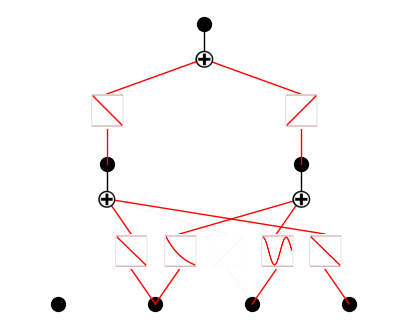

In [21]:
model.plot()

In [22]:
from kan.utils import ex_round
ex_round(model.symbolic_formula()[0][0],2)

5.93*x_2 - 0.02*x_3 + 2.15*x_4 + 0.45*cos(7.64*x_3 - 6.15) - 9.34 + 12.46*exp(-1.54*x_2)

In [23]:
print('before')
print('rmse: ', rmse)
print('mae: ', mae)
print('r2: ', r2_score)

predictions = model(dataset['true_test_input']).detach().numpy()
rmse = mean_squared_error(y_test, predictions, squared=False)
mae=mean_absolute_error(y_test, predictions)
r2 = r2_score(dataset['true_test_label'], predictions)

print('\n after')
print('rmse: ', rmse)
print('mae: ', mae)
print('r2: ', r2_score)

before
rmse:  0.30751281652203094
mae:  0.20091509654802497
r2:  <function r2_score at 0x00000232C7C14F70>

 after
rmse:  0.2776735979530236
mae:  0.18360328340270343
r2:  <function r2_score at 0x00000232C7C14F70>
